# Quantifying Shape Features

### Purpose: To move from thresholding to segmentation and shape feature quantification

Created by: Hawley Helmbrecht

Creation Date: 08/20/2020

Last Update: 

*Step 1: Import Necessary Packages*

In [9]:
import numpy as np
import pandas as pd
from scipy import ndimage

import skimage.filters
from skimage import morphology
from skimage.measure import label, regionprops, regionprops_table
from skimage.color import label2rgb
from skimage import io

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

*Step 2: User Inputs*

In [10]:
#replace the example path from my computer with the path to the image on your computer

cell_im_location = '/Users/hhelmbre/Desktop/packages/textile/example_data/ogd_cells.tif'

Note: The cell image being read in is from the OGD Severity study by Rick Liao, Andrea Joseph, Mengying Zhang, Mike McKenna, Jeremy Filteau, and Hawley Helmbrecht within the Nance lab. It is an image taken from the thalamus with a costain DAPI/PI/Iba

*Step 3: Reading in the Image*

In [11]:
cell_im = io.imread(cell_im_location)

*Step 4: Viewing the Image*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


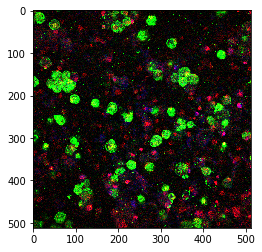

In [12]:
plt.imshow(cell_im)

*Step 5: Splitting Channels for Thresholding*

In [13]:
red_cell_im = cell_im[:,:, 0]
green_cell_im = cell_im[:,:,1]
blue_cell_im = cell_im[:,:,2]

*Step 6: Applying the Otsu Threshold*

In [14]:
thresh_otsu = skimage.filters.threshold_otsu(green_cell_im)
binary_otsu = green_cell_im > thresh_otsu

*Step 7: Checking our Threshold*

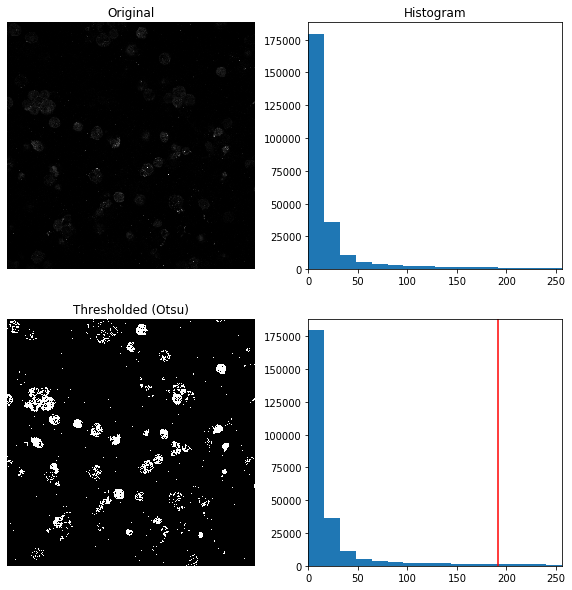

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(green_cell_im.ravel(), bins=256)
ax[0, 1].set_title('Histogram')
ax[0, 1].set_xlim((0, 256)) 

ax[1, 0].imshow(binary_otsu, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (Otsu)')

ax[1, 1].hist(green_cell_im.ravel(), bins=256)
ax[1, 1].axvline(thresh_otsu, color='r')
ax[1, 1].set_xlim((0, 256)) 

for a in ax[:, 0]:
    a.axis('off')
plt.show()

*Step 8: Removing Small Objects from the Threshold (Otsu) Image*

In [16]:
new_binary_otsu = morphology.remove_small_objects(binary_otsu, min_size=64)

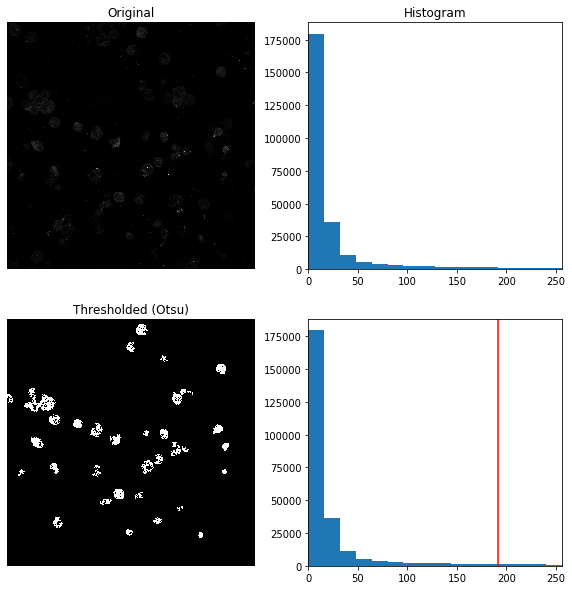

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(green_cell_im.ravel(), bins=256)
ax[0, 1].set_title('Histogram')
ax[0, 1].set_xlim((0, 256)) 

ax[1, 0].imshow(new_binary_otsu, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (Otsu)')

ax[1, 1].hist(green_cell_im.ravel(), bins=256)
ax[1, 1].axvline(thresh_otsu, color='r')
ax[1, 1].set_xlim((0, 256)) 

for a in ax[:, 0]:
    a.axis('off')
plt.show()

*Step 9: Labeling the Image*

In [18]:
label_image = label(new_binary_otsu)
image_label_overlay = label2rgb(label_image, image=new_binary_otsu, bg_label=0)

*Step 10: Viewing the labeled image with area boxes*

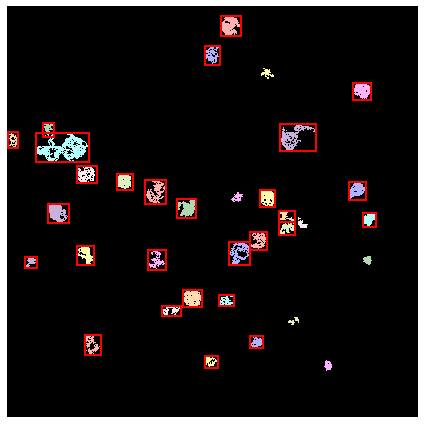

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

*Step 10: Filling in shape holes to see if it improves our labeling*

In [20]:

new_binary_otsu = ndimage.binary_fill_holes(new_binary_otsu)

In [21]:
label_image = label(new_binary_otsu)
image_label_overlay = label2rgb(label_image, image=new_binary_otsu, bg_label=0)

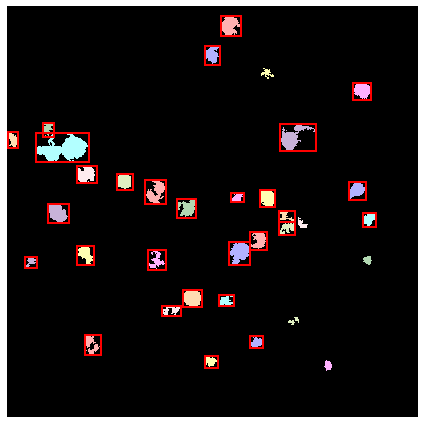

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

*Step 12: Getting a .csv file of multiple regionprops*

In [26]:
from skimage import measure 

props = measure.regionprops_table(label_image, properties=('perimeter',
                                                 'area',
                                                 'major_axis_length',
                                                 'minor_axis_length',))

In [29]:
green_shape_features = pd.DataFrame(props)

*Step 13: Viewing the Table*

In [30]:
green_shape_features

perimeter  area  major_axis_length  minor_axis_length
0    92.325902   398          24.750160          21.789002
1    88.497475   273          22.775196          17.030246
2    62.455844    96          15.844868          11.405677
3    73.597980   326          21.986401          19.258513
4    66.319805   141          18.364886          11.386040
5   175.367532   549          44.011915          24.212775
6    65.284271   149          21.371495          10.038171
7   269.764502  1256          65.499988          30.102618
8    98.568542   359          24.536601          20.128970
9    67.183766   278          19.458901          18.351436
10  138.539105   400          32.007922          20.255763
11   71.148232   273          22.414415          16.632530
12   72.183766   298          21.794251          17.842311
13   53.248737   106          15.135545          10.024481
14  113.325902   310          23.436687          21.121892
15   86.633514   418          28.839157          18.759902
16   64.734019   104          20.396389          10.979636
17   55.455844   172          17.048075          13.428827
18   49.006097    87          16.640548           8.465925
19   92.355339   174          23.645523          12.076006
20   90.876154   269          23.399764          17.338734
21  115.468037   471          28.472946          22.551306
22   82.876154   259          25.025280          14.793145
23  113.461941   212          25.850101          16.783083
24   38.970563    89          11.671078          10.189621
25   52.491378   102          16.325600          10.180455
26   73.355339   389          23.454029          21.172053
27   60.284271   146          18.082660          12.543023
28   95.597980   164          25.196094          12.292747
29   47.763456    66          16.329932           7.814187
30  121.189863   236          25.551360          17.504336
31   63.734019   148          16.779587          12.720599
32   56.870058   144          15.122871          12.997929
33   37.213203    96          13.451644           9.303028

*Step 14: Caculating the Circularity*

In [32]:
green_shape_features['circularity'] = 4*np.pi*green_shape_features.area/green_shape_features.perimeter**2

In [33]:
green_shape_features

perimeter  area  major_axis_length  minor_axis_length  circularity
0    92.325902   398          24.750160          21.789002     0.586740
1    88.497475   273          22.775196          17.030246     0.438037
2    62.455844    96          15.844868          11.405677     0.309268
3    73.597980   326          21.986401          19.258513     0.756303
4    66.319805   141          18.364886          11.386040     0.402849
5   175.367532   549          44.011915          24.212775     0.224328
6    65.284271   149          21.371495          10.038171     0.439318
7   269.764502  1256          65.499988          30.102618     0.216885
8    98.568542   359          24.536601          20.128970     0.464331
9    67.183766   278          19.458901          18.351436     0.773973
10  138.539105   400          32.007922          20.255763     0.261894
11   71.148232   273          22.414415          16.632530     0.677711
12   72.183766   298          21.794251          17.842311     0.718699
13   53.248737   106          15.135545          10.024481     0.469783
14  113.325902   310          23.436687          21.121892     0.303328
15   86.633514   418          28.839157          18.759902     0.699865
16   64.734019   104          20.396389          10.979636     0.311873
17   55.455844   172          17.048075          13.428827     0.702819
18   49.006097    87          16.640548           8.465925     0.455228
19   92.355339   174          23.645523          12.076006     0.256351
20   90.876154   269          23.399764          17.338734     0.409319
21  115.468037   471          28.472946          22.551306     0.443923
22   82.876154   259          25.025280          14.793145     0.473860
23  113.461941   212          25.850101          16.783083     0.206940
24   38.970563    89          11.671078          10.189621     0.736422
25   52.491378   102          16.325600          10.180455     0.465194
26   73.355339   389          23.454029          21.172053     0.908439
27   60.284271   146          18.082660          12.543023     0.504841
28   95.597980   164          25.196094          12.292747     0.225505
29   47.763456    66          16.329932           7.814187     0.363548
30  121.189863   236          25.551360          17.504336     0.201925
31   63.734019   148          16.779587          12.720599     0.457856
32   56.870058   144          15.122871          12.997929     0.559506
33   37.213203    96          13.451644           9.303028     0.871138

*Step 15: Calculating the Aspect Ratio*

In [36]:
green_shape_features['aspect_ratio'] = green_shape_features.major_axis_length/green_shape_features.minor_axis_length

In [37]:
green_shape_features

perimeter  area  major_axis_length  minor_axis_length  circularity  \
0    92.325902   398          24.750160          21.789002     0.586740   
1    88.497475   273          22.775196          17.030246     0.438037   
2    62.455844    96          15.844868          11.405677     0.309268   
3    73.597980   326          21.986401          19.258513     0.756303   
4    66.319805   141          18.364886          11.386040     0.402849   
5   175.367532   549          44.011915          24.212775     0.224328   
6    65.284271   149          21.371495          10.038171     0.439318   
7   269.764502  1256          65.499988          30.102618     0.216885   
8    98.568542   359          24.536601          20.128970     0.464331   
9    67.183766   278          19.458901          18.351436     0.773973   
10  138.539105   400          32.007922          20.255763     0.261894   
11   71.148232   273          22.414415          16.632530     0.677711   
12   72.183766   298          21.794251          17.842311     0.718699   
13   53.248737   106          15.135545          10.024481     0.469783   
14  113.325902   310          23.436687          21.121892     0.303328   
15   86.633514   418          28.839157          18.759902     0.699865   
16   64.734019   104          20.396389          10.979636     0.311873   
17   55.455844   172          17.048075          13.428827     0.702819   
18   49.006097    87          16.640548           8.465925     0.455228   
19   92.355339   174          23.645523          12.076006     0.256351   
20   90.876154   269          23.399764          17.338734     0.409319   
21  115.468037   471          28.472946          22.551306     0.443923   
22   82.876154   259          25.025280          14.793145     0.473860   
23  113.461941   212          25.850101          16.783083     0.206940   
24   38.970563    89          11.671078          10.189621     0.736422   
25   52.491378   102          16.325600          10.180455     0.465194   
26   73.355339   389          23.454029          21.172053     0.908439   
27   60.284271   146          18.082660          12.543023     0.504841   
28   95.597980   164          25.196094          12.292747     0.225505   
29   47.763456    66          16.329932           7.814187     0.363548   
30  121.189863   236          25.551360          17.504336     0.201925   
31   63.734019   148          16.779587          12.720599     0.457856   
32   56.870058   144          15.122871          12.997929     0.559506   
33   37.213203    96          13.451644           9.303028     0.871138   

    aspect_ratio  
0       1.135901  
1       1.337338  
2       1.389209  
3       1.141646  
4       1.612930  
5       1.817715  
6       2.129023  
7       2.175890  
8       1.218970  
9       1.060348  
10      1.580188  
11      1.347625  
12      1.221493  
13      1.509858  
14      1.109592  
15      1.537277  
16      1.857656  
17      1.269513  
18      1.965591  
19      1.958058  
20      1.349566  
21      1.262585  
22      1.691681  
23      1.540248  
24      1.145389  
25      1.603622  
26      1.107782  
27      1.441651  
28      2.049671  
29      2.089780  
30      1.459716  
31      1.319088  
32      1.163483  
33      1.445942

*Step 16: Plotting some values*

In [41]:
green_shape_features['stain'] = 'iba1'

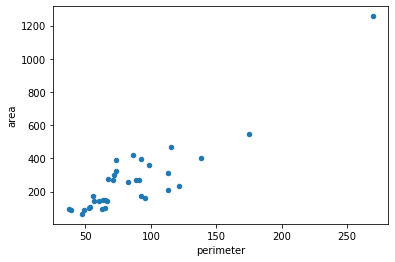

In [59]:
green_shape_features.plot(x ='perimeter', y='area', kind = 'scatter')

*Step 17: Saving as a CSV file*

In [60]:
green_shape_features.to_csv('green_shape_features.csv')

*Step 18: Individual Exploration*

Apply these steps to a different stain, try to add new features from region props, try different plotting methods in the notebook, take the CSV and do some plotting of your own!

Next Week: We will get into processing multiple images and into experimental treatment groups. 